In [33]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#코스피 지수 불러오기
kospi = pd.read_csv("kospi_data.csv")
kospi

,Date,Close,Open,High,Low,Volume,Change
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116
...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099


In [4]:
kospi['Date'] = pd.to_datetime(kospi["Date"])

In [6]:
#sp 지수 불러오기
sp = pd.read_csv("S&P500.csv")
sp

,Date,Close,Open,High,Low,Change,Log_Rate
0,1979-12-26,107.80,107.8,108.4,107.1,0.09,NaN
1,1979-12-27,108.00,108.0,108.5,107.1,0.19,0.001854
2,1979-12-28,107.80,107.8,108.6,107.2,-0.19,-0.001854
3,1979-12-31,107.90,107.9,108.5,107.3,0.09,0.000927
4,1980-01-01,107.90,107.9,107.9,107.9,0.00,0.000000
...,...,...,...,...,...,...,...
10851,2023-01-04,3852.97,"3,840.36","3,873.16","3,815.77",0.75,0.007511
10852,2023-01-05,3808.10,"3,839.74","3,839.74","3,802.42",-1.16,-0.011714
10853,2023-01-06,3895.08,"3,823.37","3,906.19","3,809.56",2.28,0.022584
10854,2023-01-09,3892.09,"3,910.82","3,950.57","3,890.42",-0.08,-0.000768


In [38]:
sp['Date'] = pd.to_datetime(sp["Date"])

실업률이 상승하면 주가가 하락한다

주말 효과 : 주중일별수익률에서 월요일에는 수익률이 낮고 금요일에는 수익률이 높은 현상

마천루의 저주

Big buildings, big declines

1) 롯데월드 타워 (2016.12.22)

In [9]:
# kospi지수
kospi[(kospi['Date'] >= "2015-01-01") & (kospi["Date"] <= "2017-12-31")]

,Date,Close,Open,High,Low,Volume,Change
9137,2015-01-02,1926.44,1914.24,1929.15,1909.67,258780000.0,0.0057
9138,2015-01-05,1915.75,1921.96,1921.96,1903.37,313440000.0,-0.0055
9139,2015-01-06,1882.45,1895.48,1900.02,1877.38,303690000.0,-0.0174
9140,2015-01-07,1883.83,1878.90,1887.60,1876.27,280510000.0,0.0007
9141,2015-01-08,1904.65,1895.85,1907.23,1891.77,262210000.0,0.0111
...,...,...,...,...,...,...,...
9869,2017-12-21,2429.83,2471.34,2471.73,2429.83,247330000.0,-0.0172
9870,2017-12-22,2440.54,2437.59,2444.57,2426.94,230410000.0,0.0044
9871,2017-12-26,2427.34,2447.67,2457.19,2427.34,224640000.0,-0.0054
9872,2017-12-27,2436.67,2420.86,2436.68,2411.48,194850000.0,0.0038


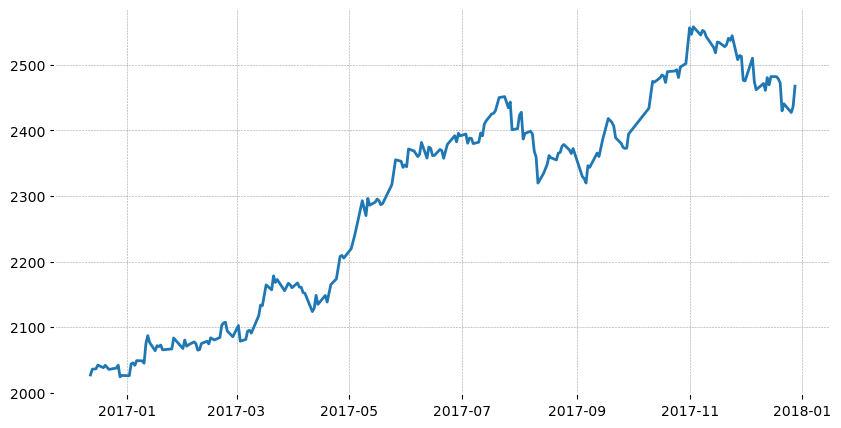

In [53]:
# 롯데월드 타워
plt.figure(figsize = (10,5))
x = kospi[(kospi['Date'] >= "2016-12-10") & (kospi["Date"] <= "2017-12-31")]['Date']
y = kospi[(kospi['Date'] >= "2016-12-10") & (kospi["Date"] <= "2017-12-31")]['Close']
plt.plot(x, y)

plt.show()

In [40]:
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
from datetime import datetime, timedelta

In [42]:
kospi_candle = pd.read_csv("kospi_data.csv", index_col = 0)
kospi_candle.index = pd.to_datetime(kospi_candle.index)

In [40]:
sp_candle = pd.read_csv("S&P500.csv", index_col = 0)
sp_candle.index = pd.to_datetime(sp_candle.index)

In [41]:
sp_candle

,Close,Open,High,Low,Change,Log_Rate
Date,,,,,,
1979-12-26,107.80,107.8,108.4,107.1,0.09,NaN
1979-12-27,108.00,108.0,108.5,107.1,0.19,0.001854
1979-12-28,107.80,107.8,108.6,107.2,-0.19,-0.001854
1979-12-31,107.90,107.9,108.5,107.3,0.09,0.000927
1980-01-01,107.90,107.9,107.9,107.9,0.00,0.000000
...,...,...,...,...,...,...
2023-01-04,3852.97,"3,840.36","3,873.16","3,815.77",0.75,0.007511
2023-01-05,3808.10,"3,839.74","3,839.74","3,802.42",-1.16,-0.011714
2023-01-06,3895.08,"3,823.37","3,906.19","3,809.56",2.28,0.022584


In [48]:
sp_candle['Low'] = [x.replace(",", "") for x in sp_candle['Low']]
sp_candle = sp_candle.astype({'Low':'float64'})

AttributeError: 'float' object has no attribute 'replace'

In [49]:
sp_candle['Open'] = [x.replace(",", "") for x in sp_candle['Open']]
sp_candle = sp_candle.astype({'Open':'float64'})

AttributeError: 'float' object has no attribute 'replace'

In [46]:
sp_candle['High'] = [x.replace(",", "") for x in sp_candle['High']]
sp_candle = sp_candle.astype({'High':'float64'})

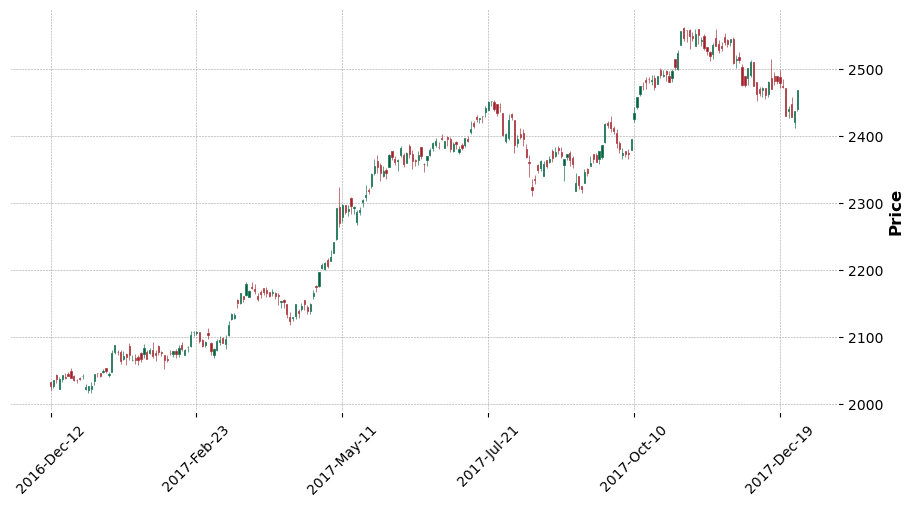

In [54]:
#fig = mpf.figure(figsize=(50, 20))
mpf.plot(kospi_candle['2016-12-10':'2017-12-31'], type='candle', style='charles', figratio = (10,5))
plt.show()

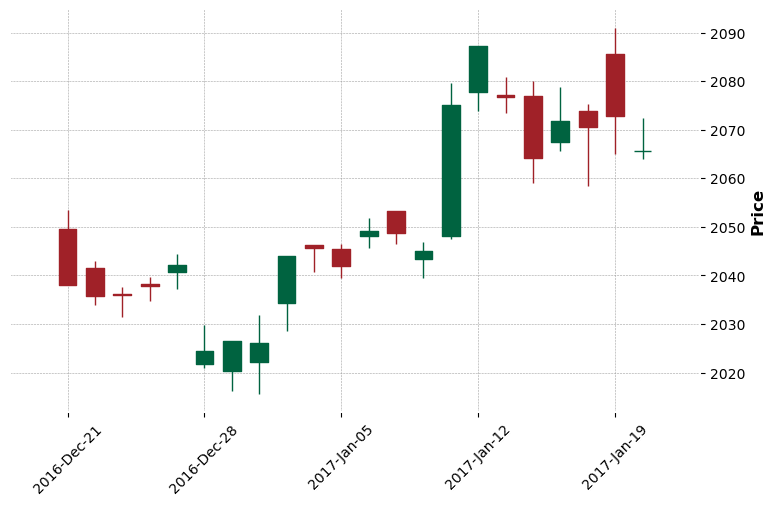

In [55]:
mpf.plot(kospi_candle['2016-12-21':'2017-01-21'], type='candle', style='charles', figratio = (5, 3))
plt.show()

양봉 : 시가보다 주가가 상승하여 종가가 높게 끝나는 경우 : 초록색
음봉 : 시가보다 주가가 하락하여 종가가 더 낮게 끝나는 경우 : 빨간색

상하이 타워 2014년 8월 28일

In [53]:
#상하이 종합지수 불러오기
china = pd.read_csv("상하이종합 내역.csv")

In [56]:
china['Date'] = pd.to_datetime(china["Date"])

In [60]:
china

,Date,Close,Open,High,Low,Volume,Change %
0,2013-08-30,2098.38,"2,097.22","2,114.39","2,089.10",17.01B,0.05%
1,2013-08-29,2097.23,"2,108.44","2,110.89","2,088.24",13.33B,-0.19%
2,2013-08-28,2101.30,"2,092.31","2,113.82","2,080.86",16.14B,-0.11%
3,2013-08-27,2103.57,"2,095.44","2,105.38","2,090.43",12.63B,0.34%
4,2013-08-26,2096.47,"2,061.42","2,097.34","2,056.13",11.99B,1.90%
5,2013-08-23,2057.46,"2,075.93","2,079.85","2,029.36",11.24B,-0.47%
6,2013-08-22,2067.12,"2,069.31","2,083.33","2,062.37",9.09B,-0.28%
7,2013-08-21,2072.96,"2,076.27","2,076.32","2,056.91",8.74B,0.02%
8,2013-08-20,2072.59,"2,081.97","2,098.98","2,066.07",10.74B,-0.62%
9,2013-08-19,2085.60,"2,055.13","2,091.13","2,052.70",9.74B,0.83%


In [59]:
china['Close'] = [x.replace(",", "") for x in china['Close']]
china = china.astype({'Close':'float64'})

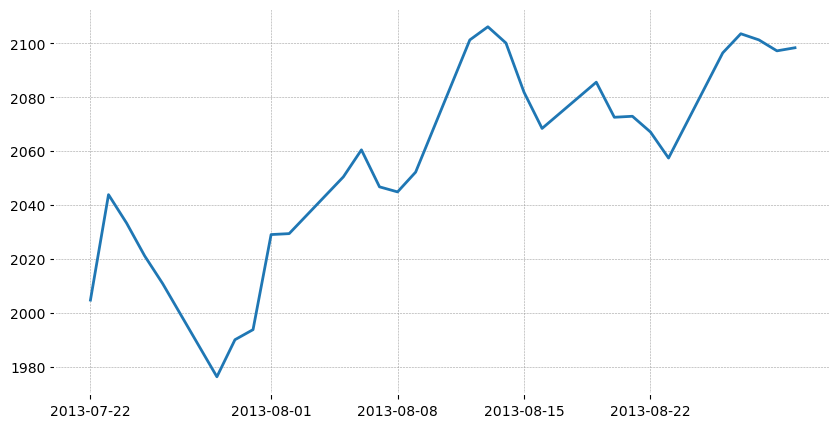

In [61]:
plt.figure(figsize = (10,5))
x = china['Date']
y = china['Close']
plt.plot(x, y)

plt.show()

In [84]:
china_candle = pd.read_csv("상하이종합 내역.csv", index_col = 0)
china_candle.index = pd.to_datetime(china_candle.index)

In [94]:
china_candle = china_candle.sort_index(ascending=True)
china_candle

,Close,Open,High,Low,거래량,Change,Volume
Date,,,,,,,
2013-07-22,2004.76,1977.73,2005.47,1970.64,8.29,0.61%,8290000000
2013-07-23,2043.88,2008.95,2051.53,2005.09,10.95,1.95%,10950000000
2013-07-24,2033.33,2035.69,2042.77,2010.42,10.67,-0.52%,10670000000
2013-07-25,2021.17,2037.34,2045.37,2016.43,9.85,-0.60%,9850000000
2013-07-26,2010.85,2013.19,2021.57,2000.80,7.38,-0.51%,7380000000
2013-07-29,1976.31,1997.84,1997.84,1969.85,7.87,-1.72%,7870000000
2013-07-30,1990.06,1981.45,2006.23,1965.36,7.72,0.70%,7720000000
2013-07-31,1993.80,2000.79,2015.47,1987.88,7.02,0.19%,7020000000
2013-08-01,2029.07,2000.82,2029.93,1997.06,9.13,1.77%,9130000000


In [87]:
china_candle['Low'] = [x.replace(",", "") for x in china_candle['Low']]
china_candle = china_candle.astype({'Low':'float64'})
china_candle['Open'] = [x.replace(",", "") for x in china_candle['Open']]
china_candle = china_candle.astype({'Open':'float64'})
china_candle['High'] = [x.replace(",", "") for x in china_candle['High']]
china_candle = china_candle.astype({'High':'float64'})
china_candle['Close'] = [x.replace(",", "") for x in china_candle['Close']]
china_candle = china_candle.astype({'Close':'float64'})

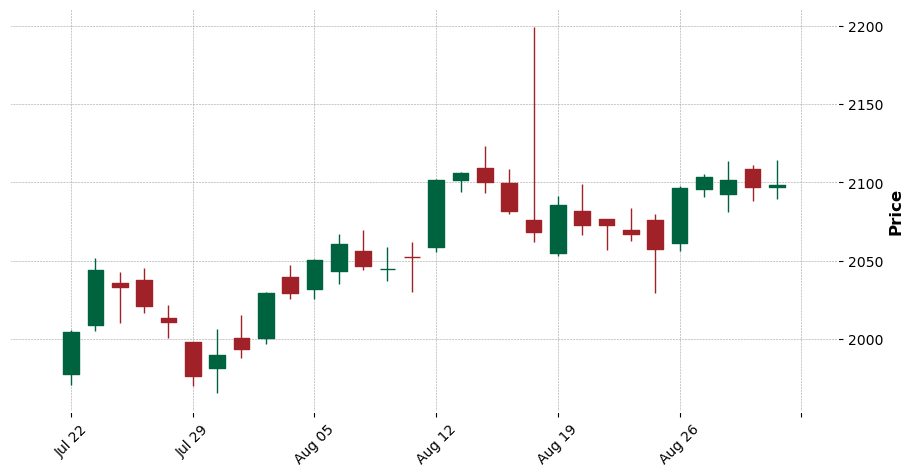

In [95]:
mpf.plot(china_candle, type='candle', style='charles', figratio = (10,5))
plt.show()

두바이 부르즈 할리파 (2009년 10월 1일)

In [100]:
dubai = pd.read_csv("DFM General 내역.csv", index_col = 0)
dubai.index = pd.to_datetime(dubai.index)

In [106]:
dubai

,Close,Open,High,Low,거래량,Change,Volume
Date,,,,,,,
2009-09-23,2204.27,2128.50,2206.70,2128.50,925.48,3.60%,925480000
2009-09-24,2185.03,2202.52,2202.52,2143.69,540.36,-0.87%,540360000
2009-09-27,2197.08,2185.03,2206.86,2163.68,643.65,0.55%,643650000
2009-09-28,2140.53,2195.32,2195.32,2131.64,414.05,-2.57%,414050000
2009-09-29,2162.20,2142.28,2187.06,2142.28,511.28,1.01%,511280000
2009-09-30,2191.03,2162.20,2192.54,2132.61,478.78,1.33%,478780000
2009-10-01,2194.64,2190.16,2208.07,2179.25,515.51,0.16%,515510000
2009-10-04,2192.31,2192.89,2193.77,2151.45,264.97,-0.11%,264970000
2009-10-05,2236.50,2193.18,2237.68,2193.18,759.78,2.02%,759780000


In [102]:
dubai['Low'] = [x.replace(",", "") for x in dubai['Low']]
dubai = dubai.astype({'Low':'float64'})
dubai['Open'] = [x.replace(",", "") for x in dubai['Open']]
dubai = dubai.astype({'Open':'float64'})
dubai['High'] = [x.replace(",", "") for x in dubai['High']]
dubai = dubai.astype({'High':'float64'})
dubai['Close'] = [x.replace(",", "") for x in dubai['Close']]
dubai = dubai.astype({'Close':'float64'})

In [105]:
dubai = dubai.sort_index(ascending=True)

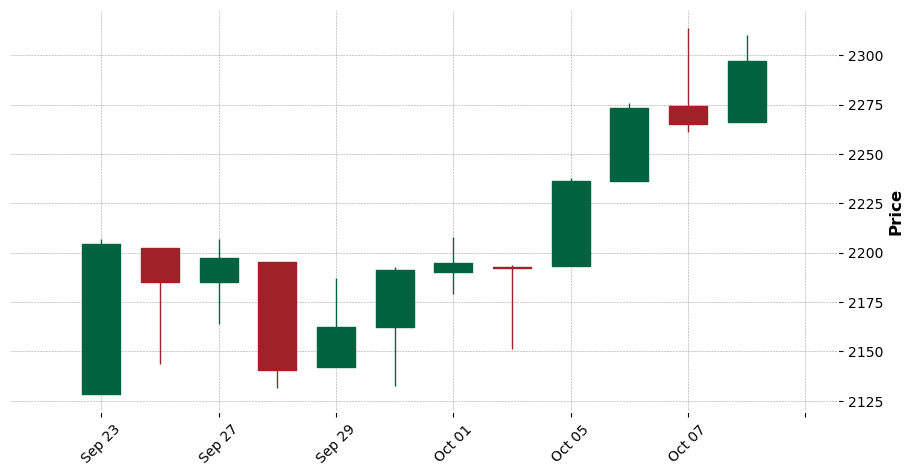

In [107]:
mpf.plot(dubai, type='candle', style='charles', figratio = (10,5))
plt.show()

# 1

In [108]:
#로그 수익률
kospi['Close_lag'] = kospi['Close'].shift(1)
kospi['Log_Rate'] = np.log(kospi['Close']/kospi['Close_lag'])
kospi

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667
...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857


In [109]:
#월간 수익률
kospi['Date'] = pd.to_datetime(kospi['Date'])
kospi['Month'] = [x.month for x in kospi['Date']]
kospi['Year'] = [x.year for x in kospi['Date']]

In [110]:
kospi_df = pd.DataFrame({'Year':kospi['Year'], 'Month':kospi['Month']}).drop_duplicates(['Year', 'Month'])
kospi_df

,Year,Month
0,1981,5
24,1981,6
49,1981,7
75,1981,8
100,1981,9
...,...,...
10919,2022,4
10940,2022,5
10961,2022,6
10981,2022,7


In [111]:
rate = kospi.groupby(['Year', 'Month'])['Log_Rate'].sum()
rate

Year  Month
1981  5        0.021609
      6        0.177294
      7       -0.018067
      8       -0.055531
      9       -0.057284
                 ...   
2022  4       -0.022962
      5       -0.003401
      6       -0.141015
      7        0.049699
      8        0.008348
Name: Log_Rate, Length: 496, dtype: float64

In [112]:
kospi_df['Monthly_Rate'] = list(rate)
kospi_df

,Year,Month,Monthly_Rate
0,1981,5,0.021609
24,1981,6,0.177294
49,1981,7,-0.018067
75,1981,8,-0.055531
100,1981,9,-0.057284
...,...,...,...
10919,2022,4,-0.022962
10940,2022,5,-0.003401
10961,2022,6,-0.141015
10981,2022,7,0.049699


<AxesSubplot:xlabel='Month'>

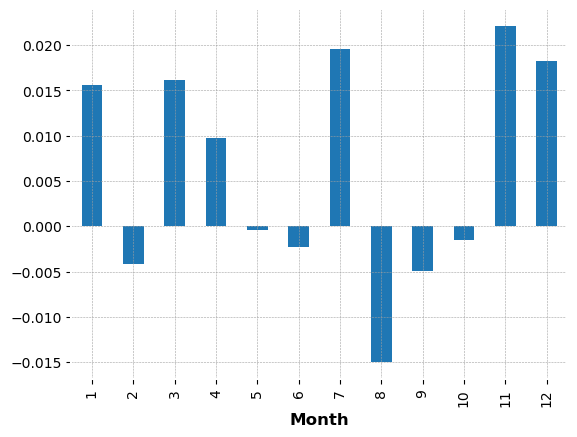

In [113]:
#모든 년도에서 동일 연도끼리 
kospi_df.groupby('Month')['Monthly_Rate'].mean().plot(kind = 'bar')

11, 12월 모평균 / 다른 달 모평균 계산

1981 ~ 2022 까지 41개의 표본 존재. ( n>= 30 이므로 CLT, 정규분포라 가정, s) 이때 독립 가정

(a)
H0 = $\mu _{11}+\mu _{12} > \mu _{1}+\mu _{2}+\mu _{3}+\mu _{4}+\mu _{5} + \mu _{6} + \mu _{7} + \mu _{8} + \mu _{9} + \mu _{10} $ 

$ \therefore \mu _{1112} - \mu _{110} > 0 $

H1 = not H0

In [114]:
# (a)는 위와 같은 두 모집단 추론을 통해 검정하려고 합니다. 
# (b)는 더미변수 사용해서 검정하도록 하겠습니다. 검정은 월요일 회의 전까지 완성하도록 하겠습니다. 

In [115]:
# 1981은 5월부터 있으므로  1982부터 시작하겠음.
kospi_df[(kospi_df['Year'] == 1982)]

,Year,Month,Monthly_Rate
195,1982,1,-0.043985
219,1982,2,0.024605
243,1982,3,-0.007404
268,1982,4,-0.051610
293,1982,5,-0.057905
317,1982,6,0.076188
343,1982,7,0.011579
369,1982,8,-0.025424
395,1982,9,-0.018457
421,1982,10,0.018211


<AxesSubplot:xlabel='Month'>

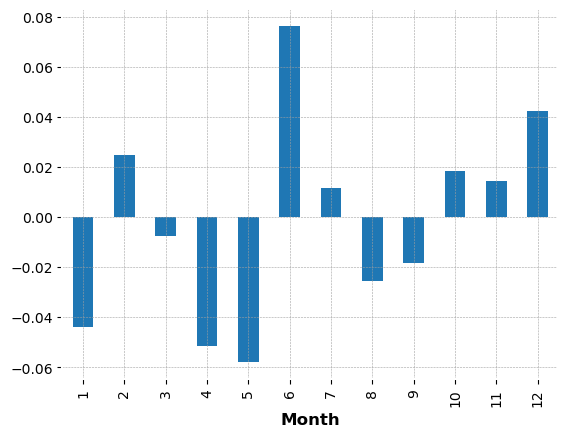

In [116]:
kospi_df[(kospi_df['Year'] == 1982)].groupby('Month')['Monthly_Rate'].mean().plot(kind = 'bar')
# 바 차트